# FER .ipynb implementation
In this notebook file is an adaptation of the Facial expression recognition module.

[You can find the original project here](https://github.com/justinshenk/fer)

Please run the notebook on Google Colab. 
Ensure that you enable the Free GPU in Colab, and check it with the next cell.

In [3]:
!pip install -q fer
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
# Upload your file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Video_One.mp4 to Video_One.mp4
User uploaded file "Video_One.mp4" with length 2747456 bytes


In [5]:
%matplotlib inline
from fer import Video
from fer import FER
import matplotlib.pyplot as plt
import os
import sys
# fn contains the video file name (Ensure that you only upload one file)
videofile = fn
# Face detection
detector = FER(mtcnn=True)
# Video predictions
video = Video(videofile)

# Output list of dictionaries
raw_data = video.analyze(detector, display=False)

INFO:fer:30.00 fps, 583 frames, 19.43 seconds
INFO:fer:Making directories at output
100%|██████████| 583/583 [07:21<00:00,  1.32frames/s]
INFO:fer:Completed analysis: saved to output/Video_One_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 17%
INFO:fer:Compressing: 25%
INFO:fer:Compressing: 34%
INFO:fer:Compressing: 42%
INFO:fer:Compressing: 51%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 68%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 85%
INFO:fer:Compressing: 94%
INFO:fer:Zip has finished


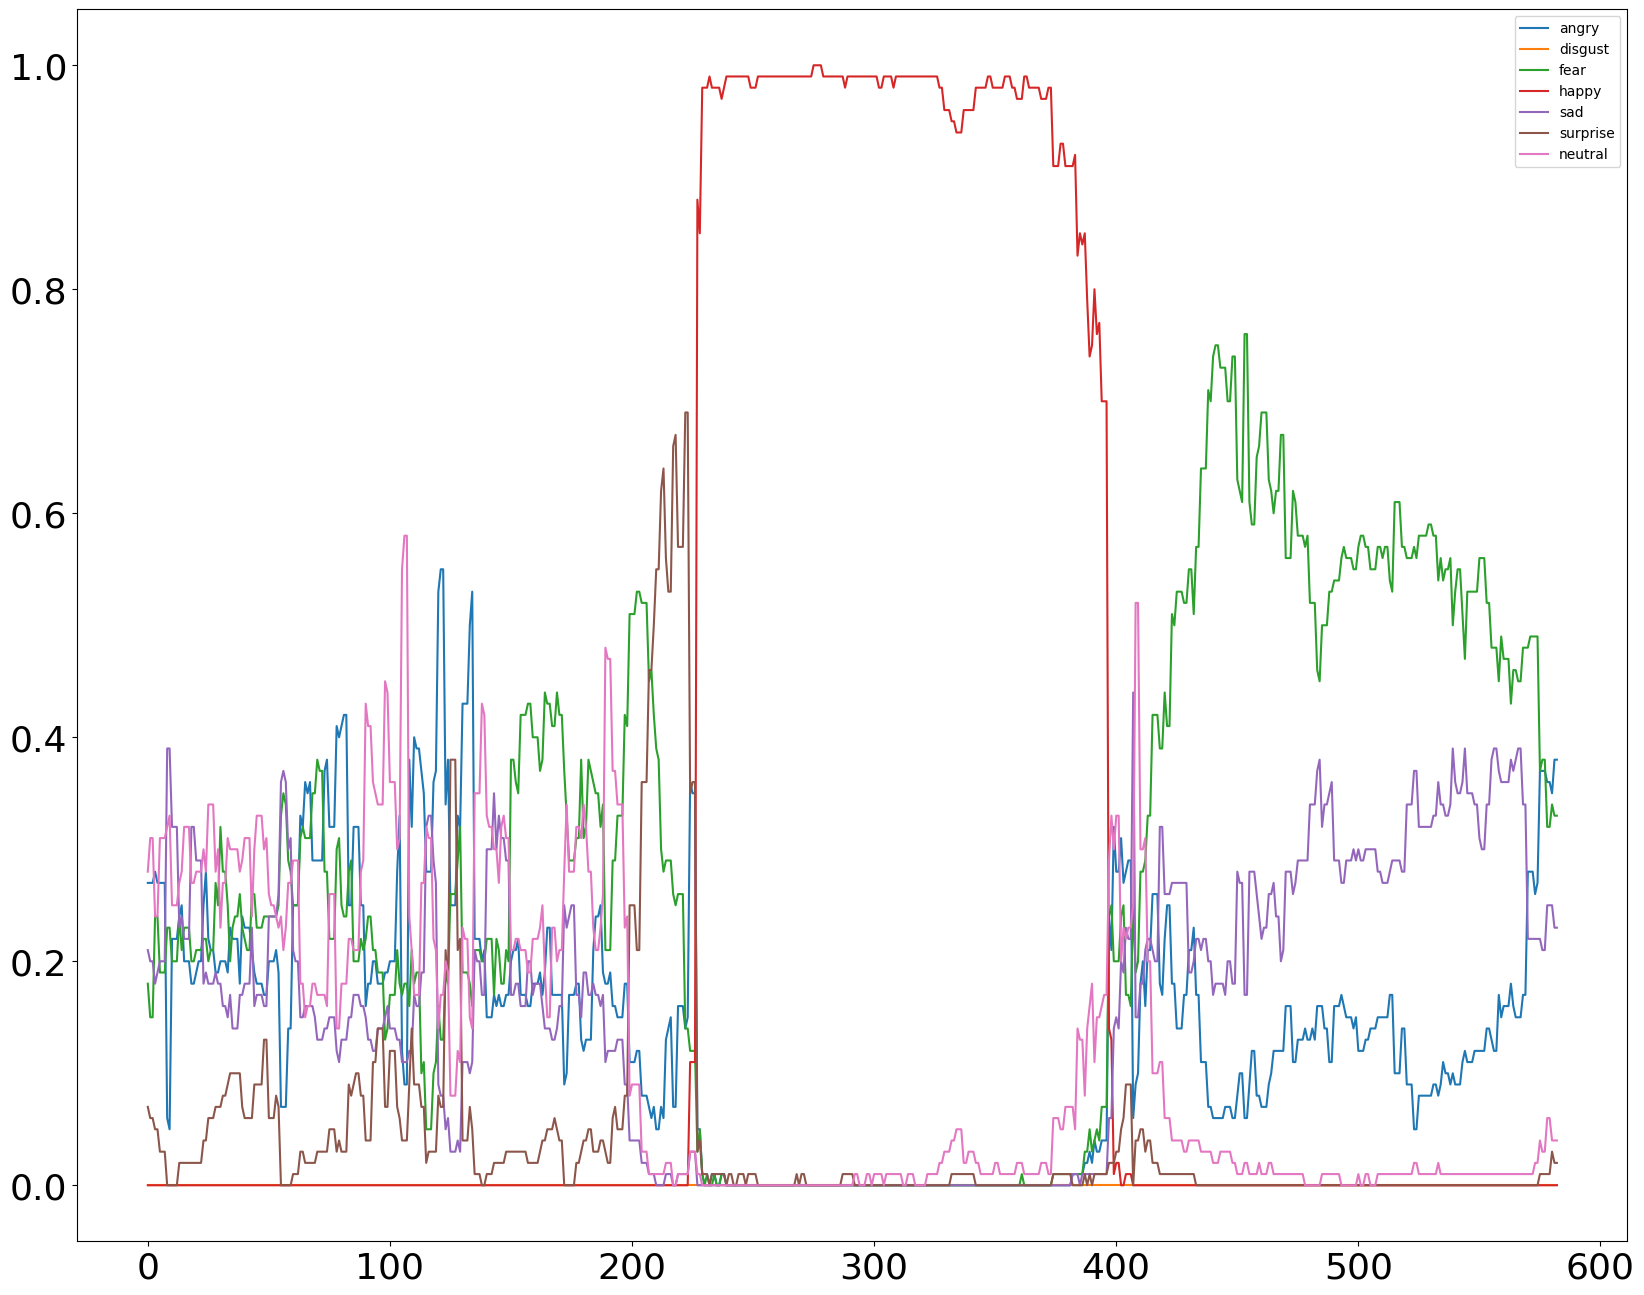

In [6]:
# Convert to pandas for analysis
df = video.to_pandas(raw_data)
df = video.get_first_face(df)
df = video.get_emotions(df)

# Plot emotions
fig = df.plot(figsize=(20, 16), fontsize=26).get_figure()
# Filename for plot
fig.savefig('my_figure.png')